# Research Notebook
## Kelly Hayes
## Due Date: January 27th, 2025

# 1: Experience
## Describe at least one research activity you worked on this week.

- Installed COLOSSUS code library for Python
- Ran the tutorial tutorial_halo_splashback.ipynb from the COLOSSUS tutorials [1] to work towards our goal to replicate Figure 6 in reference [2]

## Motivation:

We will be using the COLOSSUS library to analyze data during this research project, particularly to analyze the splashback radius of fuzzy cold dark matter. This tutorial walks the user through graphing the splashback radius using different models and comparing the results. In general, this introduces us to the use of COLOSSUS and gives an example of a use case for it that is relevant to the analysis we will be performing, as well as showing us the different models that authors may mean when they reference "splashback radius".

<span style="color: red;">4.Good </span>

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Our goal was to further understand how to utilize COLOSSUS in our research. The first topic covered was importing modules, including setting a cosmology for COLOSSUS:

    from __future__ import print_function 
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    from colossus.cosmology import cosmology
    cosmology.setCosmology('planck18');

Fortunately for us, COLOSSUS also has a splashback module, which is imported like so:

    from colossus.halo import splashback
    for model_name in splashback.models:
        print(model_name)
    
The second part of that bit of code above prints the different splashback models we can use, including: 
adhikari14
more15
shi16
mansfield17
diemer17
diemer20

The tutorial lists the differences between these models as follows:
" the radius where the profile is steepest (more15), the radius that includes a certain fraction of particle apocenters (diemer17, diemer20), three-dimensional shells (mansfield17), or idealized caustics in 1D theoretical models (adhikari14, shi16). Comparisons between different models should thus be approached with care."

Next up, the differences between these splashback models is plotted by plotting the predicted splashback radius of each model as a function of mass accretion rate for a halo with $M_{\rm 200m} = 10^{12} M_{\odot}/h$ at $z = 0$. Inserted below is the code used:

    from colossus.lss import peaks

    z = 0.0
    M200m = 1E12
    nu200m = peaks.peakHeight(M200m, z)
    Gamma = np.arange(0.0, 5.1, 0.1)

    plt.figure()
    plt.xlabel('Accretion rate')
    plt.ylabel('Rsp/R200m')
    for model_name in splashback.models:
        RspR200m, mask = splashback.splashbackModel('RspR200m', Gamma = Gamma, nu200m = nu200m, z = z, 
                                    model = model_name, rspdef = 'sp-apr-p75', statistic = 'median')
        plt.plot(Gamma[mask], RspR200m, label = model_name.replace('_', '\_'))
    plt.legend();

Returning the following image: 
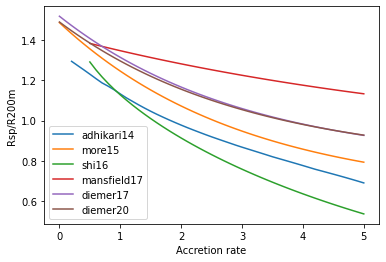

This tutorial also seeks to show that given only mass, some models can create a splashback mass and radius prediction. Three models are showcased as such using the following code:

    nu200m = np.arange(0.5, 4.1, 0.1)

    plt.figure()
    plt.xlabel('Peak height')
    plt.ylabel('Rsp/R200m')
    for model_name in splashback.models:
        if 'nu200m' in splashback.models[model_name].q_in:
            RspR200m, mask = splashback.splashbackModel('RspR200m', nu200m = nu200m, z = z, 
                                        model = model_name, rspdef = 'sp-apr-p75', statistic = 'median')
            plt.plot(nu200m[mask], RspR200m, label = model_name.replace('_', '\_'))
    plt.legend();
    
To produce the following image:
(It is impossible for me insert the image, I have tried every method.)

Another fortunate thing about COLOSSUS is that the splashback function can compute splashback features in physical coordinates, for example, using the following code found in the tutorial:

    z = 0.0
    mdef = 'vir'
    Mvir = 1E12
    cvir = 10.0

    Rsp, Msp, _ = splashback.splashbackRadius(z, mdef, M = Mvir, c = cvir, rspdef = 'sp-apr-p90')
    print(Rsp, Msp)
    
Finally, the last interesting feature this tutorial taught us was that the default model, diemer20, can predict the splashback radius as a function of only the halo mass! The following code was provided to show this:

    Rsp, Msp, _ = splashback.splashbackRadius(z, mdef, M = Mvir, c = cvir, Gamma = 3.0, rspdef = 'sp-apr-p90')
    print(Rsp, Msp)

<span style="color: red;"> Very good. </span>

# 3: So what? (What does it mean?)
## Describe your results

I now understand some of the options that the COLOSSUS module has for computing splashback radius, particularly by using the splashback function and the variety of models for computation that are offered. The image above is a successful replication of the image found in the documentation [2] that represents the difference in the models! Using these methods, we can model splashback radii and better understand the splashback radii in fuzzy and cold dark matter, which brings us closer to our research goals.

<span style="color: red;"> Describe the results here. You did this in the previous section, but spend some time here describing what these results mean. </span>

# 4. Now what? (What's next?)
## Plan for the next week

The intended goal of replicating figure 6 in reference [2] was achieved! As a group, we are still working towards finding a time when we can all meet to discuss the next steps! We have a meeting tentatively booked, and next Monday, we will discuss the next steps of our research plan.

<span style="color: red;"> Good, but tie this section back to the motivation. What do you plan to do next to get closer to your stated research aims. </span>

# 5. Bibliography

[1] B. Diemer, Bitbucket, https://bitbucket.org/bdiemer/colossus/src/master/tutorials/tutorial_halo_splashback.ipynb (accessed Jan. 27, 2025). 

[2] B. Diemer, “Colossus: A python toolkit for cosmology, large-scale structure, and dark matter halos,” The Astrophysical Journal Supplement Series, vol. 239, no. 2, p. 35, Dec. 2018. doi:10.3847/1538-4365/aaee8c 




| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2       |
| Experience    |       2       |
| What?         |       2       |
| So what?      |       3       |
| Now what?     |       3       |
| Bibliography  |       3       |
| Style         |       3       |
| Total         |       18      |